### Deep Learning - Assignment 2 - CH22M503

#### Author - Aloy Banerjee
###### Roll No. CH22M503

## 1 Artificial Neural Networks (10)
#### 1. This entire assignment must be completed in a jupyter notebook. Only numpy and matplotlib libraries can be used
#### 2. In this assignment our goal is to code an artificial neural network including backpropagation and gradient descent from scratch.
#### 3. The dataset to be used is the MNIST dataset. The dataset can be loaded with the given dataloading code. You can use 20% of the train data from the given script for validation. You can create batches for training if you would like, but it is not necessary.
#### 4. The network must be a simple multi-layer perceptron of 2 layers L1 and L2. L1 layer will take an input of size(28*28=784) which is the size of an MNIST image. It will output a hidden acivation of size 128. Layer L2 will take an input of size 128 and output a tensor of size 10 with SOFTMAX class probabilities.
#### 5. The activation function used for the hidden layer must be the ReLU activation function. The activation for the output layer must be the softmax activation. Softmax is an activation function used for multiclass classification to generate class probabilities. 𝑠𝑜 𝑓 𝑡𝑚𝑎𝑥(𝑧)𝑖 =𝑒𝑥𝑝(𝑧𝑖) Í𝑗 𝑒𝑥𝑝(𝑧 𝑗 )
#### 6. Intialise the weights for the layers using np.random.uniform and use the Mean Squared Error as the loss function.
#### 7. Calculate the error and the weight updates using the Chain rule of differentiation. Calculating the derivaive of the relu and the softmax activation is left to the student. Include the correct derivative in a text box.
#### 8. In a text box write the full update rule for error of L1 and L2.
#### 9. The weights are expected to be updated with the stochastic gradient descent algorithm. This can look like the following:
#### L1 = L1 − l r ∗ upda t eL1
#### L2 = L2 − l r ∗ upda t eL2
#### where lr is the learning rate and L1 and L2 are the weight matrices for the network. 1
#### 10. Calculate and store the loss and accuracy in an array. Both training loss and validation loss must be calculated. Once training is complete, plot the array in matplotlib with loss and accuracy on the y axis and epochs on the x axis. Accuracy should be in yellow between 0 to 1 and loss should be in blue. Marks will only be provided if plots are provided. Finally there must be two graphs. One for training and one for validation. Graphs should be well labeled and legend must be provided.
#### 11. Optional Guide for functions:
##### relu(x) -> Ouputs: ReLU activation of x
##### d_relu(x) -> Outputs: Derivative of relu for chain rule
##### d_softmax(x) -> Outputs: Derivative of softmax for chain rule
##### softmax(x) -> Ouputs: Softmax activation of x
##### forward_and_backward(x, y) -> Outputs: out, UpdateL1, UpdateL2
##### loss(out, y) -> Outputs: Mean Squared Error between out and target y
##### train(x, y, lr, epochs) -> Your training loop and gradient descent update

#### Importing Library

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import requests, gzip, os, hashlib
from IPython import display

#### Define the constant value

In [3]:
learning_rate = 0.001
epochs = 50
np.random.seed(22)
path='C:\\Users\\Admin\\Coding-M-Tech\\Deep Learning - ID6001W\\Assignment 2'
manual_cal_img_path = 'C:\\Users\\Admin\\Coding-M-Tech\\Deep Learning - ID6001W\\Assignment 2\\Submitted\\raw1.png'
derivative_softmax = 'C:\\Users\\Admin\\Coding-M-Tech\\Deep Learning - ID6001W\\Assignment 2\\Submitted\\DSoftmax.jpeg'
derivative_relu = 'C:\\Users\\Admin\\Coding-M-Tech\\Deep Learning - ID6001W\\Assignment 2\\Submitted\\DRelu.jpeg'

#### Derivative of softmax

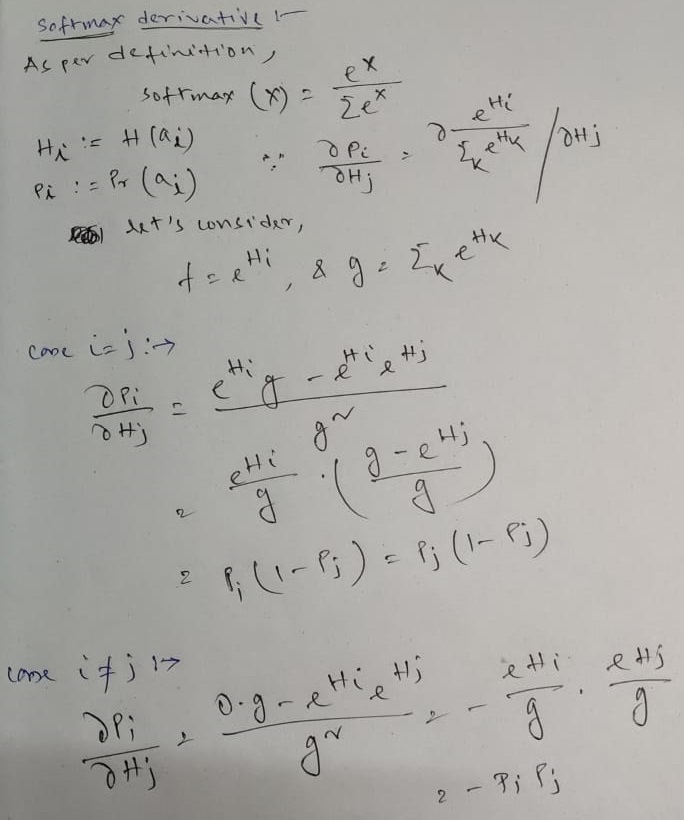

In [4]:
display.Image(derivative_softmax)

#### Derivative of Relu

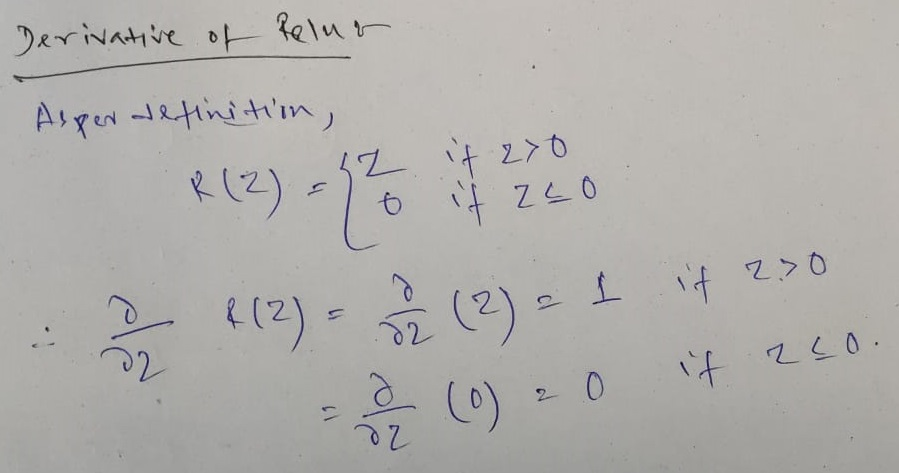

In [29]:
display.Image(derivative_relu)

#### Display manual calculation of Forwardpass and back propagation

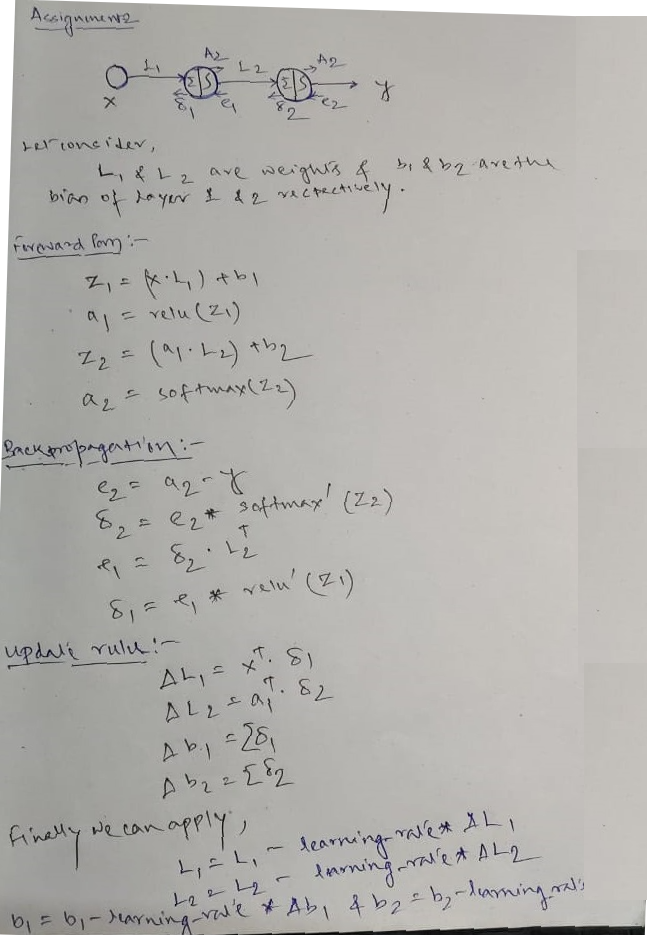

In [23]:
display.Image(manual_cal_img_path)

#### Common Method

In [3]:
def initialize_weight(x,y):
    '''Initialize the weight based on dimention'''
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

def fetch(url):
    '''Fetch the data from the given url'''
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

def load_data():
    """Load the MNIST data and split that into train, validation and test set"""
    X_train_full = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
    Y_train_full = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
    train_size = int(0.8 * len(X_train_full))
    X_train = X_train_full[:train_size, :]
    X_validation = X_train_full[train_size:, :]
    Y_train = Y_train_full[:train_size]
    Y_validation = Y_train_full[train_size:] 
    X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
    Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]
    return X_train,X_validation,Y_train,Y_validation,X_test,Y_test

def relu(x):
    '''Perform relu operation on input'''
    return np.maximum(0,x)

def d_relu(x):
    '''Perform derivative of relu'''
    x[x<=0] = 0
    x[x>0] = 1
    return x

def softmax(z):
    '''Perform softmax operation on input'''
    return np.exp(z) / np.sum(np.exp(z),axis=1, keepdims=True)

def d_softmax(z):
    '''Perform derivative of softmax'''
    s = softmax(z)
    return s * (1 - s)

def forward_and_backward(x, y, L1, L2, b1, b2):
    '''Perform forward and back propagation'''
    # Forward pass
    z1 = np.dot(x, L1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, L2) + b2
    out = softmax(z2)
    # Backward pass 
    e2 = out -y
    delta2 = e2 * d_softmax(z2)
    e1 = delta2@L2.T
    delta1 = e1 * d_relu(z1)
    dL1 = np.dot(x.T, delta1)
    dL2 = np.dot(a1.T, delta2) 
    db1 = np.sum(delta1, axis=0)
    db2 = np.sum(delta2, axis=0)  
    #print(f'Dimension : - Z1 = {z1.shape}, A1 = {a1.shape}, Z2 = {z2.shape}, out = {out.shape}, E2 = {e2.shape}, delta2 = {delta2.shape}')
    return out, dL1, dL2, db1, db2

def forward(x, L1, L2, b1, b2):
    '''Perform forward pass'''
    # Forward pass
    z1 = np.dot(x, L1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, L2) + b2
    out = softmax(z2)    
    return out

def loss(out, y):
    '''Calculate MSE loss'''
    return np.mean(np.square(out - y))

def train(x, y, lr, epochs, val_data=None):
    '''Train the neural network'''
    train_loss, val_loss, train_acc, val_acc = [], [], [], [] 
    L1=initialize_weight(28*28,128)
    L2=initialize_weight(128,10)
    b1 = np.zeros(128)    
    b2 = np.zeros(10)
    
    for i in range(epochs):
        loss_epoch = []
        acc_epoch = []
        for j in range(x.shape[0]):
            # Forward and backward pass
            out, dL1, dL2, db1, db2 = forward_and_backward(x[j:j+1], y[j:j+1], L1, L2, b1, b2)
            # Update weights & bias
            L1 -= lr * dL1
            L2 -= lr * dL2
            b1 -= lr * db1
            b2 -= lr * db2
            # Calculate loss and accuracy
            loss_epoch.append(loss(out, y[j:j+1]))
            pred_class = np.argmax(out)
            true_class = np.argmax(y[j:j+1])
            acc_epoch.append(pred_class == true_class)

        # Calculate training loss and accuracy for epoch
        train_loss.append(np.mean(loss_epoch))
        train_acc.append(np.mean(acc_epoch))

        if val_data is not None:
            # Calculate validation loss and accuracy for epoch
            val_loss_epoch = []
            val_acc_epoch = []
            for j in range(val_data[0].shape[0]):
                out = forward(val_data[0][j:j+1], L1, L2, b1, b2)
                val_loss_epoch.append(loss(out, val_data[1][j:j+1]))
                pred_class = np.argmax(out)
                true_class = np.argmax(val_data[1][j:j+1])
                val_acc_epoch.append(pred_class == true_class)
                
            # Calculate validation loss and accuracy for epoch    
            val_loss.append(np.mean(val_loss_epoch))
            val_acc.append(np.mean(val_acc_epoch))

        # Print progress
        print("Epoch:", i+1, "Training Loss:", train_loss[-1], "Training Acc:", train_acc[-1], "Validation Loss:", val_loss[-1], "Validation Acc:", val_acc[-1])

    if val_data is not None:
        return train_loss, val_loss, train_acc, val_acc
    else:
        return train_loss, train_acc
    
def plotAccuracyLoss(train_losses, validation_losses, train_accuracy, validation_accuracy):
    '''Plot Loss and Accuracy'''    
    # Plotting for training set
    ax1 = plt.subplot()
    l1, = ax1.plot(train_losses, color='blue')
    ax2 = ax1.twinx()
    l2, = ax2.plot(train_accuracy, color='yellow')
    plt.legend([l1, l2], ["Training Loss", "Training Accuracy"])
    #plt.xlabel('Epochs')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel("Loss")
    ax2.set_ylabel("Accuracy")
    plt.show()
    # Plotting for validation set
    ax1 = plt.subplot()
    l1, = ax1.plot(validation_losses, color='blue')
    ax2 = ax1.twinx()
    l2, = ax2.plot(validation_accuracy, color='yellow')
    plt.legend([l1, l2], ["Validation Loss", "Validation Accuracy"])
    #plt.xlabel('Epochs', fontsize=20)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel("Loss")
    ax2.set_ylabel("Accuracy")
    plt.show()

#### Loading the MNIST data set 

In [4]:
X_train,X_validation,Y_train,Y_validation,X_test,Y_test = load_data()

#### Verifying the dimention of the loaded dataset 

In [5]:
print(f'X_train Shape : {X_train.shape}')
print(f'X_validation Shape : {X_validation.shape}')
print(f'Y_train Shape : {Y_train.shape}')
print(f'Y_validation Shape : {Y_validation.shape}')
print(f'X_test Shape : {X_test.shape}')
print(f'Y_test Shape : {Y_test.shape}')

X_train Shape : (48000, 28, 28)
X_validation Shape : (12000, 28, 28)
Y_train Shape : (48000,)
Y_validation Shape : (12000,)
X_test Shape : (10000, 784)
Y_test Shape : (10000,)


#### Normalize input and one hot encoding

In [6]:
# Normalize the input images
X_train = X_train.astype('float32') / 255.
X_validation = X_validation.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# Convert the labels to one-hot encoding
Y_train = np.eye(10)[Y_train]
Y_validation = np.eye(10)[Y_validation]
Y_test = np.eye(10)[Y_test]

#### Flattening the input dataset  

In [7]:
# Flatten the images
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_validation = X_validation.reshape((len(X_validation), np.prod(X_validation.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

##### Verifying the dimention of the loaded dataset after flattening

In [8]:
print(f'X_train Shape : {X_train.shape}')
print(f'X_validation Shape : {X_validation.shape}')
print(f'X_test Shape : {X_test.shape}')

X_train Shape : (48000, 784)
X_validation Shape : (12000, 784)
X_test Shape : (10000, 784)


#### Artificial Neural Network implementation and training ( Forward pass and back propagation)

In [9]:
train_losses, validation_losses, train_accuracy, validation_accuracy = train(X_train, Y_train, learning_rate, epochs, val_data=[X_validation,Y_validation])

Epoch: 1 Training Loss: 0.08653502841629143 Training Acc: 0.46979166666666666 Validation Loss: 0.07460841722589165 Validation Acc: 0.5209166666666667
Epoch: 2 Training Loss: 0.04780210615647272 Training Acc: 0.7081041666666666 Validation Loss: 0.032974007974397014 Validation Acc: 0.7938333333333333
Epoch: 3 Training Loss: 0.030946917061669292 Training Acc: 0.8023333333333333 Validation Loss: 0.027351860863014586 Validation Acc: 0.8156666666666667
Epoch: 4 Training Loss: 0.024014084510061273 Training Acc: 0.8441458333333334 Validation Loss: 0.018350570555487788 Validation Acc: 0.88375
Epoch: 5 Training Loss: 0.018019817683949245 Training Acc: 0.8850625 Validation Loss: 0.01592400750815136 Validation Acc: 0.8966666666666666
Epoch: 6 Training Loss: 0.016334220209693554 Training Acc: 0.896125 Validation Loss: 0.014938063193105224 Validation Acc: 0.9031666666666667
Epoch: 7 Training Loss: 0.015434786958456253 Training Acc: 0.9015625 Validation Loss: 0.01431423275940997 Validation Acc: 0.907

#### Plotting the loss and accuracy 

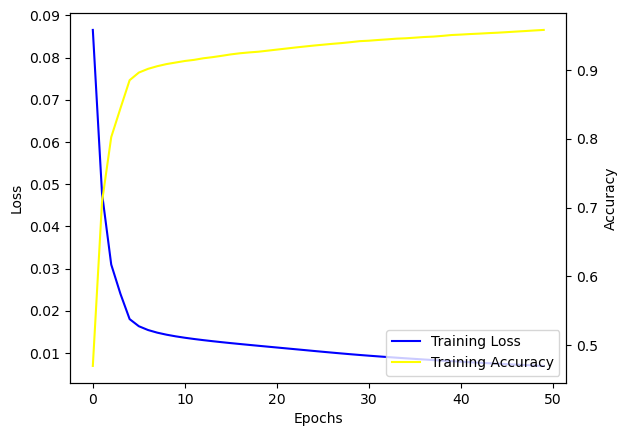

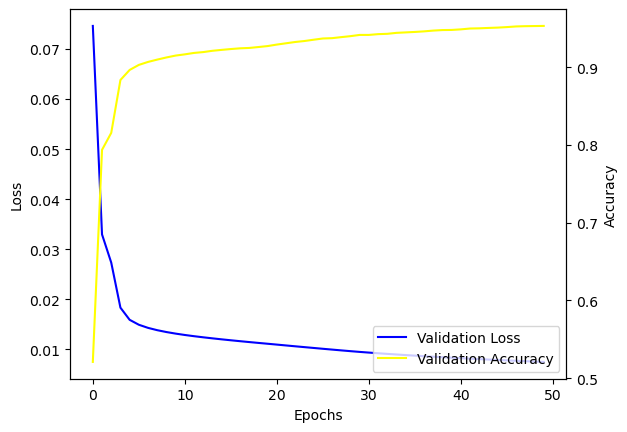

In [10]:
plotAccuracyLoss(train_losses, validation_losses, train_accuracy, validation_accuracy)